In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load Data
df_pok = pd.read_csv('pokemon.csv')
df_fuel = pd.read_csv('fuel-econ.csv')

In [3]:
# Pokémon Dataset
df_pok.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
# Fuel Dataset
df_fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [5]:
# Transform (un-pivot) dataset for visualization purpose using Pandas 'melt' function
# it’s basically changing the dataset from wide to long format where columns become values, func arguments are as follows:
# id vars = cols to keep
# value vars = cols to pivot
# var_name = new col name of pivoted cols (type_1, type_2)
# value_name = new col name of pivoted cols values (grass, poison, etc...)

pok_type = df_pok.melt(id_vars = ['id','species'], value_vars = ['type_1','type_2'], var_name= 'type_level', value_name= 'type')

pok_type.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


### Univariate visualizations - One variable

- Barplots and pie charts for qualitative (categorical) variables
- Histogram for quantitative variables

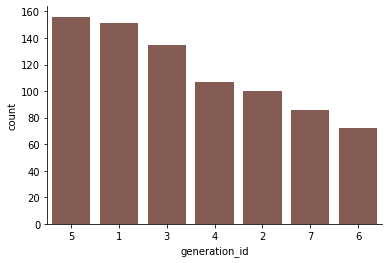

In [6]:
# Plot of pok gen id 

# Selecting color
color = sns.color_palette()[5]

# Sorting data
sort_gen = df_pok.generation_id.value_counts().index

# Plotting
sns.countplot(x = df_pok.generation_id, order = sort_gen, color = color);

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

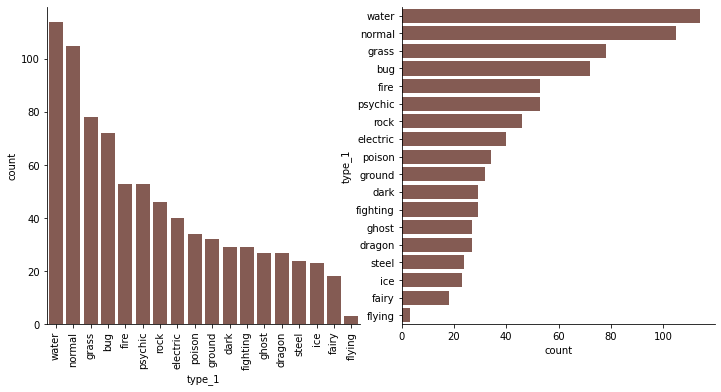

In [7]:
# plot of pok type_1

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
fig.tight_layout()
ax1, ax2 = axes

sort_type = df_pok.type_1.value_counts().index

sns.countplot(x = df_pok.type_1, order = sort_type, color = color, ax = ax1)

# use y axis for h bars
sns.countplot(y = df_pok.type_1, order = sort_type, color = color, ax = ax2)

ax1.spines["top"].set_alpha(0.0); ax1.spines["right"].set_alpha(0.0)

# rotation of xtics
ax1.tick_params(axis = 'x', labelrotation = 90)

ax2.spines["top"].set_alpha(0.0); ax2.spines["right"].set_alpha(0.0)

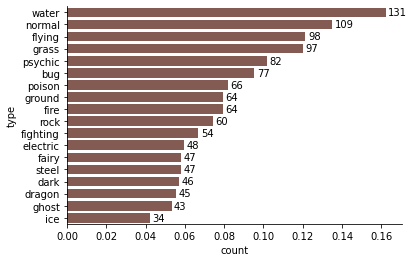

In [8]:
# plot of pok both types, showing both count and proportions

sort_type_2 = pok_type.type.value_counts().index

# we want to show proportion of each type beside it's count, so we have to establish an array of proportions

# total pok count
n_pok = df_pok.shape[0]

# max type count, in our case 'water', 0 gets first as its sorted from high to low
max_type_n = pok_type.type.value_counts()[0]

# max type proportion
max_proportion = max_type_n / n_pok

# establish the proportion array, using 2% as a step
tick_props = np.arange(0, max_proportion, 0.02)

# format tick names to be consistent
tick_names = ['{:0.2f}'.format(v) for v in tick_props ]

# multiply proportion by the number to get the the correct postion for each type
plt.xticks(tick_props * n_pok, tick_names)

sns.countplot(y = pok_type.type, order = sort_type_2, color = color )

# place count on top of each bar
for i in range(pok_type.type.value_counts().shape[0]):
    count = pok_type.type.value_counts()[i]
    plt.text(count + 1, i, count, va = 'center')

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

#### Pie charts

Best used in the following cases:

- show how the WHOLE data is broken into parts
- plotting small number of slices (3-5)

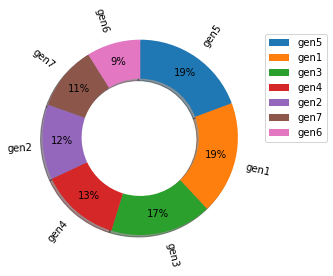

In [9]:
gen_id = df_pok.generation_id.value_counts()

# can use gen_id.index as labels instead
# wedgeprops makes a Donut Plot
# autopct display % of each label to the whole
# pctdistance control position of autopct inside the widge
plt.pie(gen_id, labels= ['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'], startangle= 90, counterclock= False, 
        wedgeprops={'width' : 0.4}, autopct = lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '', pctdistance = 0.8, 
        rotatelabels=30, shadow = True)

plt.legend(bbox_to_anchor=(1.05, 1), loc = 2)

plt.axis('square');

#### Histogram

- For exploring quantitative variable
- Each bar(bin) represent counts of a range of data points 
- Bins include values in their left end and exclude the right ones
- Bin size affect the interpretation of data, large bin size may conceal information and small bin size may introduce noise, its best to play around with bin size and boundary(range on x axes) points to get a good understanding of plotted data
- Histograms provide graphical representation of summary statistics
- Bins with low counts might indicate errors in the data if it is counter intuitive and warrants further investigation
- For highly skewed data it’s better to change range (x axis limit) to cancel the outlier effect and zoom into majority of data

In [10]:
# Programmatic way to choose bin size

def bin_dim(df, x):
    """ calculating bin dimensions (width and count) based on freedman-Diaconis's rule for bin width in a given distribution, 
    the rule consider both sample size and spread of data points. As the sample size increase, the bin width decrease thus 
    increasing the number of bins. This could be used as a starting point of a visualization to be adjusted as needed.
    
    Parameters:
    
    df: dataframe
    x: column name
    """
    
    # 1st quartile (25%)
    q1 = df[x].describe()[4]

    # 3rd quartile (75%)
    q3 = df[x].describe()[6]

    # Interquartile range
    iqr = q3 - q1

    bin_width = round((2* iqr) / (len(df) ** (1/3)),2)

    bin_count = int(np.ceil((df[x].max() - df[x].min()) / bin_width))
    
    return bin_count , bin_width

In [11]:
# Summary statistics of Pokémon speed
df_pok.speed.describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

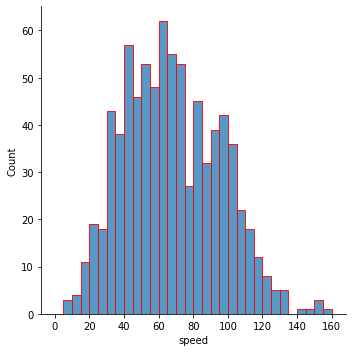

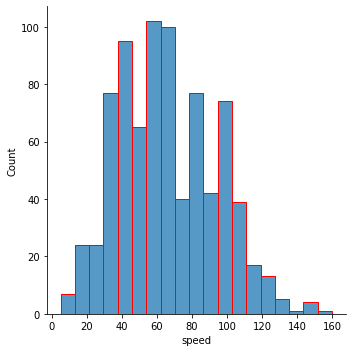

In [12]:
# Plotting summary statistics using histograms
# setting bins size to 5 , this will provide better overview of the data
# bin edges of 0 - max is to ensure that each data point is ploted.
bins = np.arange(0, df_pok.speed.max() + 5, 5)
sns.displot(df_pok.speed, kde = False, bins = bins, edgecolor = 'red')

# bin count following freedman-Diaconis's rule
sns.displot(df_pok.speed, kde = False, bins = bin_dim(df_pok, 'speed')[0], edgecolor = 'red')

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

In [13]:
# Summary statistics of Pokémon height
df_pok.height.describe()

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64

There are definitely outliers in the height variable, 75% of the data are below 1.5 with a mean of 1 and std of 1 while the max value is 14.5. If plotted as is the plot scale will be affected by the max value and other outliers and won't be much informative.

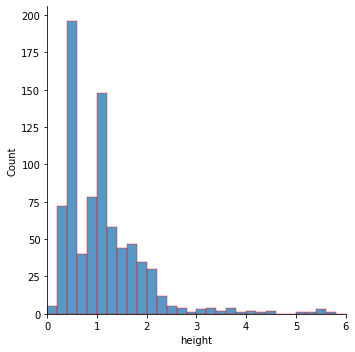

In [14]:
# Plotting Pokémon height significant outliers
bins = np.arange(0, df_pok.height.max()+0.2, 0.2)

sns.displot(df_pok.height, kde = False, bins = bins, edgecolor = 'red')

# setting xlim to ignore outliers above 6 meters highth
plt.xlim(0, 6)

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

In [15]:
# Summary statistics of Pokémon weight
df_pok.weight.describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

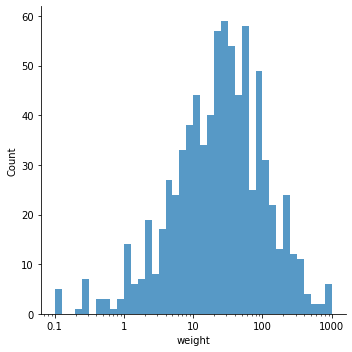

In [16]:
# since the data points are widely spread, min is 0 and max is 1k with std of 100, its better to use semi log scale,
# semi log scale is where only one axes scale is transformed to a log,
# log is simply the exponent of base n to get x
# "common log" is log with base of 10, so we basically calculate exponent(how many 10 we need to use) to get x (actual data point value)

# we first calculate min, max points to be used in our log scale, these are min, max values of describe function of a given variable
min_log = np.log10(df_pok.weight.min())

max_log = np.log10(df_pok.weight.max())

# set bin edges using this min, max scale with sizes of 0.1 ref to the base n 10
# we are using ** (power i.e exponent i.e log) to obtain x being original data point value
bins = 10 ** np.arange(min_log, max_log + 0.1, 0.1)

# set ticks range same concept used in bins, we use +2 since range is exclusive of last stop argument (max_log),
ticks = [10**x for x in range(int(min_log), int(max_log)+2)]

labels = ['{}'.format(v) for v in ticks]

sns.displot(df_pok.weight, kde=False, bins = bins)

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

# setting scale to log scale
plt.xscale('log')

# adjusting ticks for easier interpretation
plt.xticks(ticks, labels);

In [17]:
# log of describe function shows that -1 is the exponent for getting x (0.1) using base n of 10 
# for data point having min value and 3 for getting x (999.9) using base n of 10 for data point having max value

df_pok.weight.describe() , np.log10(df_pok.weight.describe())

(count    807.000000
 mean      61.771128
 std      111.519355
 min        0.100000
 25%        9.000000
 50%       27.000000
 75%       63.000000
 max      999.900000
 Name: weight, dtype: float64,
 count    2.906874
 mean     1.790786
 std      2.047350
 min     -1.000000
 25%      0.954243
 50%      1.431364
 75%      1.799341
 max      2.999957
 Name: weight, dtype: float64)

### Bivariate visualizations - Two variables

 - Scatter plots/heat maps if both variables are quantitative (also can use: error bar)
 - Violin/Box plots if one variable is qualitative while other is quantitative (also can us: Adaptive bar charts, point plots)
 - Clustered bar charts if both variables are qualitative
 - Faceting
 - Adaptation

#### Scatter plots / Heat maps

- Depicts strength of relationship between two quantitative variables based on r (correlation).
- Plots each data point based on relative location on x and y axis.
- Sampling/jitter/transparency are solutions for overlapping points. Sampling/transparency is best when data points are mix of discrete and continuous values. jitter/transparency is best when data is discrete (int not float) in nature.
- If our data is discrete in nature, plotted data points will tend to look like a fixed lines with many overlapping points, thus sampling won’t help. Jitter adds random noise to the position of each point (spread overlapping points over a small area), to allow for spacing between each data points and better view of data.
- The darker the area the more overlapping points and thus the peak of distributions.
- Heat maps is a 2d version of a histogram tends to be like looking at data from top down perspective, where the darker area represents peak of distribution (more data points in this area) so bin size is as important as in a histogram. It is favored over scatter plots in the following cases:
 - both quantitative data are discrete.
 - when transparency doesn’t help much in interpreting data, as in large volume of data.

In [18]:
df_fuel.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


In [19]:
# Summary statistics for engine size (displ) and fuel efficiency (comb)
df_fuel[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


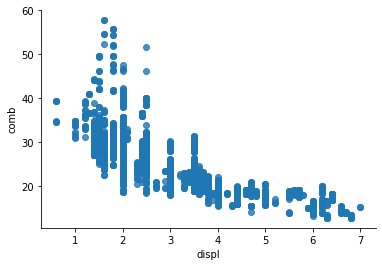

In [20]:
# plot scatter for investigating relationship between engine size (displ) and fuel efficiency (comb)
# it’s better to use x axis for independent variable and y for dependent one, in our case we are interested in
# answering the following: does engine size (independent variable) affect fuel efficiency (dependent variable)?

sns.regplot(x = df_fuel.displ, y = df_fuel.comb, fit_reg= False)

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

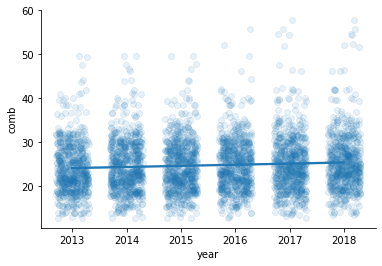

In [21]:
# plot scatter for investigating relationship between year and fuel efficiency (comb)
# does advancement in manufacturing process affect fuel efficiency?
# since both our data are discrete we would want to use jitter,
# x_jitter of 0.3 means x values will be adjusted +/- 0.3 points of original position
# scatter_kws specify the transparency of overlapping points, range is from 1 (dark) to 0 (full transparent)
# we can note that darker area (overlapping points) tends to slightly increase over the years,
# suggesting better fuel efficiency with advancement in manufacturing processes

sns.regplot(x = df_fuel.year, y = df_fuel.comb, x_jitter= 0.3, scatter_kws= {'alpha' : 0.1})

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

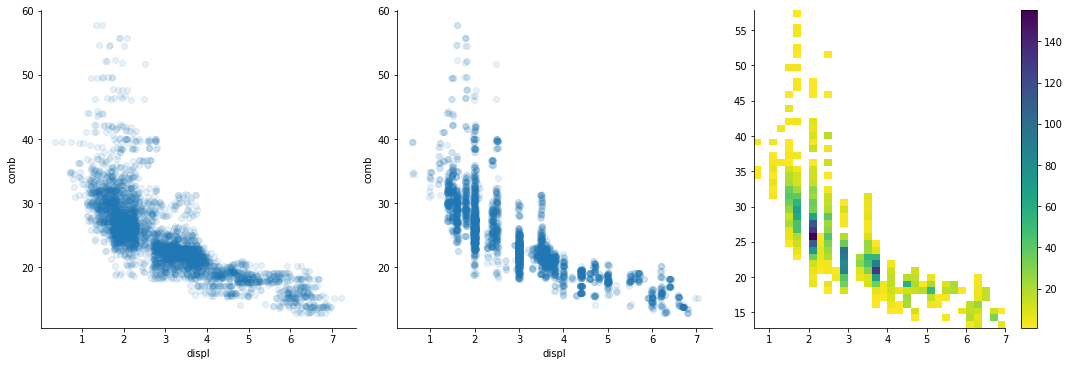

In [22]:
# comparison of different jitter parameters and a heat map

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
fig.tight_layout()
ax1, ax2 , ax3= axes

# Scatter plots
sns.regplot(x = df_fuel.displ, y = df_fuel.comb, fit_reg= False, x_jitter= 0.3, scatter_kws={'alpha': 0.1}, ax =ax1)

sns.regplot(x = df_fuel.displ, y = df_fuel.comb, fit_reg= False, x_jitter= 0.03, scatter_kws={'alpha': 0.1}, ax =ax2)

# Heat Maps
# just as a histogram default bin number is 10 and number of points in each bin is counted up and represented by a color,
# we used bin count following freedman-Diaconis's rule
# setting cmin to a value will cause bins with zero counts (no data points) to not be plotted
# r in cmap argument reverse the color bar so darker represents overlapping data points
plt.hist2d(x = df_fuel.displ, y = df_fuel.comb, cmin = 0.5, cmap = 'viridis_r', bins = [bin_dim(df_fuel, 'displ')[0] , 
                                                                                        bin_dim(df_fuel, 'comb')[0]])

plt.colorbar()

ax1.spines["top"].set_alpha(0.0); ax1.spines["right"].set_alpha(0.0) ; ax2.spines["top"].set_alpha(0.0); 
ax2.spines["right"].set_alpha(0.0) ; ax3.spines["top"].set_alpha(0.0); ax3.spines["right"].set_alpha(0.0)

#### Violin Plot

- Area (curve) depicts the distribution of points, the wider the more points. It shows the approximate density of quantitative variable for each qualitative variable
- Long tails represents outliers
- Peaked distribution (curves are steep) suggest that a specific portions have higher points of the quantitative variable than others, while less peaked distribution suggests that points are broadly distributed across the qualitative variable. If we take first plot as an example, in minicompact cars we might want to zoom in the peak area (22 comb) to further investigate which specific brands have less fuel economy than others and their related characteristics. Also, an investigation of the dip (28 comb) could also reveal some insights about brands with higher fuel economy

#### Box Plot
- is graphical representation of describe function
- Central line of each box indicates the median of the data
- Upper and lower edges shows the third and first quintile respectively
- The height of the box is the interquartile range (IQR).
- Whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. 
- The upper/lower bounds control the length of the whisker and are calculated as q3 and q1 +/- (1.5 * IQR). If max and min values are within the bound limits, whiskers lengths are stretched to represent this min and max values. Else, whiskers extend to the max/min points that are within the bounds and outliers are plotted as dots beyond end of whiskers bounds.

##### General note: if data columns are mostly 0, 1 (true, false) it’s better to use adaptive charts instead, i.e. plotting mean of second variable on the y axis

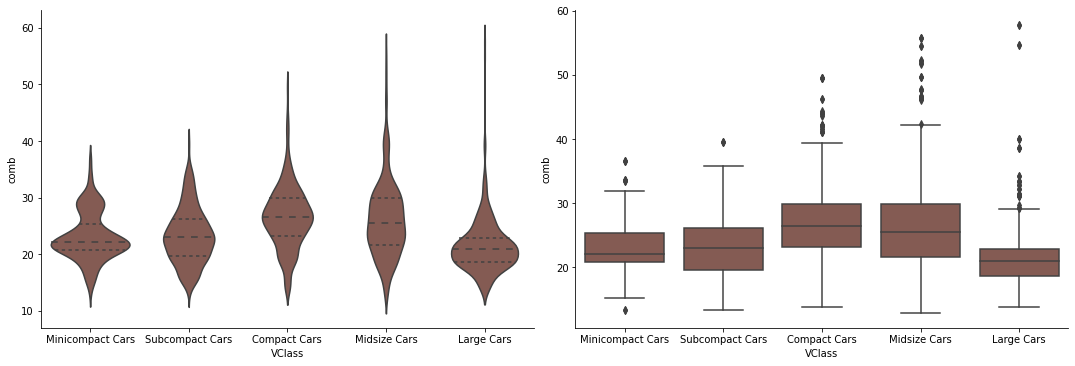

In [23]:
# we will look at car size in comparison to fuel efficiency
# it’s better to order the categorical variable for better visualization

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclass = pd.api.types.CategoricalDtype(categories = sedan_classes, ordered= True)
df_fuel.VClass = df_fuel.VClass.astype(vclass)

# plot
fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
fig.tight_layout()
ax1, ax2 = axes

sns.violinplot(x = df_fuel.VClass, y = df_fuel.comb, color = color, inner = 'quartile', ax = ax1)

sns.boxplot(x = df_fuel.VClass, y = df_fuel.comb, color = color, ax = ax2)

ax1.spines["top"].set_alpha(0.0); ax1.spines["right"].set_alpha(0.0) ; ax2.spines["top"].set_alpha(0.0); 
ax2.spines["right"].set_alpha(0.0)

#### Clustered Bar Charts and heat maps

In [24]:
# plot relationship between vehicle class and transmission type (2 qualitative variables)

# split trans column to show only whether it is automatic or manual
df_fuel['trans_type'] = df_fuel.trans.apply(lambda x: x.split()[0])

# before and after split
df_fuel[['trans','trans_type']]

,trans,trans_type
0,Automatic (AM6),Automatic
1,Automatic (AM-S6),Automatic
2,Automatic (S6),Automatic
3,Automatic (S6),Automatic
4,Automatic (S6),Automatic
...,...,...
3924,Automatic (variable gear ratios),Automatic
3925,Automatic (AM6),Automatic
3926,Automatic (AM6),Automatic
3927,Automatic (S10),Automatic


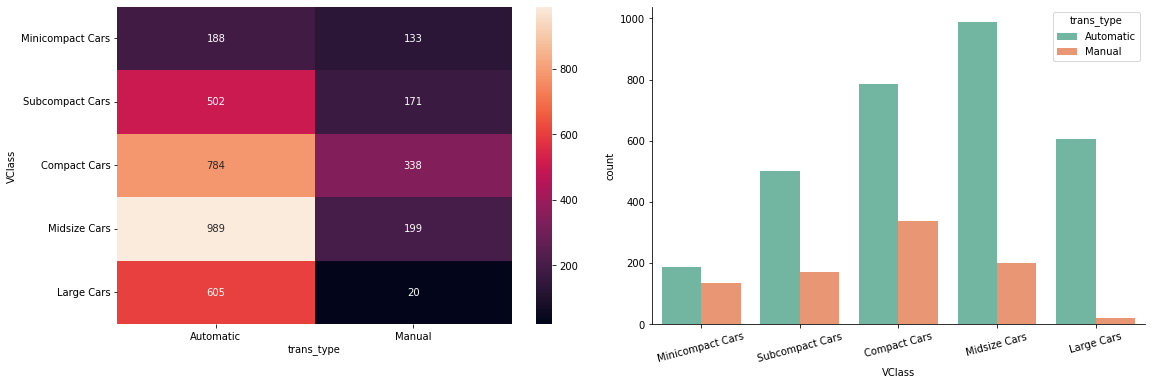

In [25]:
# prepare data, groupby the two qualitative features then reset index to convert to a dataframe and finally pivot 
counts = df_fuel.groupby(['VClass','trans_type']).size()
counts = counts.reset_index(name= 'count')
counts = counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
# # Can use the below code instead
# counts = df_fuel.groupby(['VClass','trans_type']).size().T.to_frame().unstack()
# counts.columns = counts.columns.droplevel()

fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

fig.tight_layout()

ax1, ax2 = axes

# fmt ensure count is presented as dicimal values
sns.heatmap(counts, annot = True, fmt = 'd', ax = ax1);

# hue adds the 2nd qualitative feature
sns.countplot(x = df_fuel.VClass, hue = df_fuel.trans_type, ax =ax2, palette = sns.color_palette("Set2"))

ax2.tick_params(axis = 'x', labelrotation = 15)

ax1.spines["top"].set_alpha(0.0); ax1.spines["right"].set_alpha(0.0) ; ax2.spines["top"].set_alpha(0.0); 
ax2.spines["right"].set_alpha(0.0)

#### Adaptations of Univariate Plots - to display bivariate relationships


#### Faceting

- Producing multiple copies of the same type of plot visualized on different subsets of the data.
- Best used if we have categorical variable with a lot of levels
- Ensure that axis scale and limits are similar across all plots

#### Adaptation
- plotting mean values of 2nd variable on the y axis instead of counts of main variable, mostly applicable to histograms and bar charts

#### Line plot (example: time series analysis)
- Plotting relationship between two quantitative variables, one on each axis
- y axis represents mean of 2nd variable. So for any given x value it reports the average of corresponding y value
 - emphasize relative change
 - emphasize trends on x axis

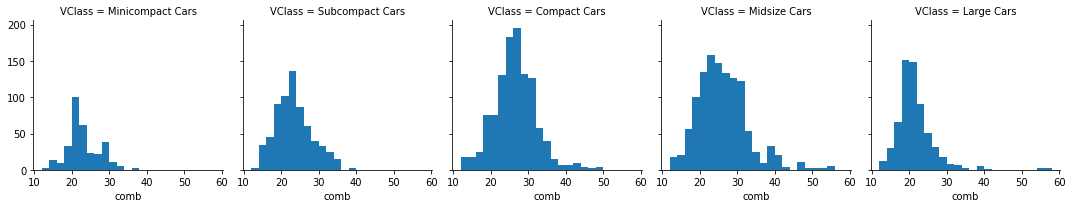

In [26]:
# Faceting

# Instantiate a facitgrid, which means that whatever plot we facet there will be on for each data in the facit grid
# use col_wrap argument to limit number of plots per row
g = sns.FacetGrid(data = df_fuel, col = 'VClass')

# map plot to the grid, first argument is the plot, second is x axis variable
bins = np.arange(12, 58 + 2, 2)
g.map(plt.hist, 'comb', bins = bins);

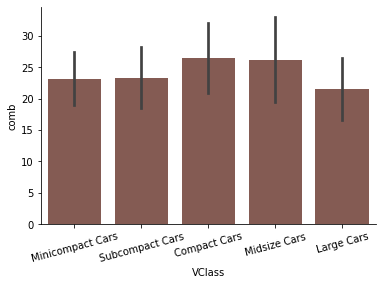

In [27]:
# Adaptation

# plotting average of fuel efficiency 'comb' on the y axis
# black lines "uncertainty whiskers" represents uncertainty about mean as a confidence interval
# the larger the higher the uncertainty, can remove them by setting 'errwidth' argument = 0
# can change the whiskers to represent standard deviation by setting argument 'ci' = 'sd'
sns.barplot(x = df_fuel.VClass, y = df_fuel.comb, color = color, ci='sd');

plt.xticks(rotation = 15)

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

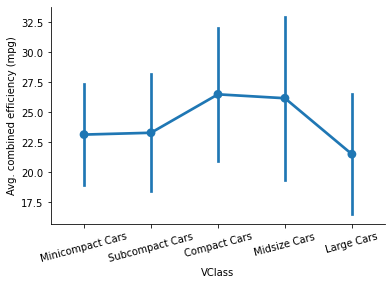

In [28]:
# Line plots

# if 0 lower bound is not of interest we can use point plot
# can remove line by setting the argument 'linestyle' = ''
sns.pointplot(x = df_fuel.VClass, y = df_fuel.comb , ci='sd');

plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)')
plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

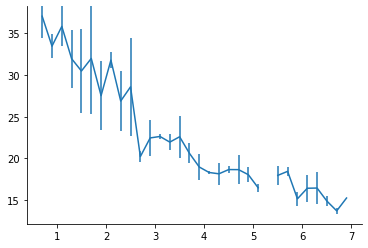

In [29]:
# plot relationship between two quantitative variables using errorbar function,
# errorbar plots a line between points with optional setting for adding error bars
# all data must be sorted by x variable and only y value for each x value, to do so we need to cut datafram into bins
# and calculate average y value for each bin as follows
# establish bin size (edge) for x variable (displ). min, max values are from describe func and bin width from our dim function
bin_e = np.arange(0.6, 7 + bin_dim(df_fuel, 'displ')[1], bin_dim(df_fuel, 'displ')[1])

# establish center values so that points are plotted in their accurate positions, excluding last edge as it won't correspond
# to a bin center
bin_c = bin_e[:-1] + 0.1

# cuting displ col into bins
displ_binned = pd.cut(df_fuel.displ, bin_e, include_lowest= True)

comb_mean = df_fuel.comb.groupby(displ_binned).mean()

comb_sd = df_fuel.comb.groupby(displ_binned).std()

# yerr argument highlight the degree of variability (std) in fuel efficiencies,
# from the plot we can note that there is a decline in fuel efficiencies with large engine sizes but with less degree of
# variability than smaller ones as noted from the length of the std whisker
plt.errorbar(x = bin_c, y = comb_mean, yerr = comb_sd)

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

### Multivariate visualizations - More than two variables

- Can be done through:

 - Non positional encoding.
 - Faceting in Two directions
 - Adaptation
 - Plot Matrix
 - Heat maps


#### Non positional encoding for third variable
- can use Shape, size or Color

 ##### Shape
 - Best for qualitative data specially nominal 
 
 ##### Size
 - Best for quantitative data
 - it’s important to pay attention to the size in relation to the variable value
 
 ##### Color
 - Can be used for both quantitative and qualitative data
 - Qualitative palettes are used for nominal data
 - Sequential palettes are used for ordinal and numeric data
 - Diverging palettes are used for ordinal and numeric data that have a meaningful center point. One hue will indicate values greater than the center point, while the other indicates values that are smaller than the center point.
 

#### Faceting in Two directions
- Making subplots for each third variable separately. Example: interest rate - loan amount - borrower rating, all three can be plotted in one single scatter plot where x is loan amount y is interest rate and borrower rating takes a specific shape or color; however, this relationship can also be plotted using facetied scatter plot across each borrower rating separately.
- Can facet across two variables one on the rows an one on the columns. Example: interest rate - loan amount - borrower rating - loan term. loan term plots will be plotted across facit grid rows and borrower rating across columns

#### Adaptation
 - plotting mean values of 3rd variable on the y axis instead of counts of main variable, mostly applicable to heatmaps and clustered barcharts
 
#### Plot Matrix / Heat maps
 - Good for getting a broad overview of pairwise relationship between variables
 - Best as an initial exploratory tool to be followed by univariate visualizations for variables of interest

#### Non positional encoding

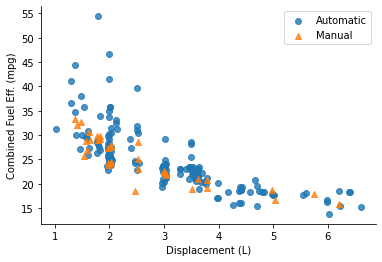

In [30]:
# Non positional encoding - Shape

# plot relationship between displ, fuel efficiency and transmission type,
# since trans type is a qualitative variable then shape is best used to reference on the plot
# marker argument can only take a single string and we have two trans types thus we need to make a loop,
# to plot each point individually

np.random.seed(45)

# use random sample of data to reduce overplotting
sample = np.random.choice(df_fuel.shape[0], 200, replace = False)
df_fuel_sub = df_fuel.loc[sample]

# instantiate shape of each trans type, circle is represented by o while triangle is represented by ^
# setting it as a list of list rather than a dict to control the order of which the levels are plotted
ttype_marker = [['Automatic', 'o'],
                ['Manual', '^']]

# plot each point individually, the plot shows that highest comb(above 35) are all automatic
for ttype, marker in ttype_marker:
    plot_data = df_fuel_sub.loc[df_fuel_sub.trans_type == ttype]
    sns.regplot(x = plot_data.displ, y = plot_data.comb, x_jitter= 0.04, fit_reg= False, marker = marker)

plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic' , 'Manual'])
plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

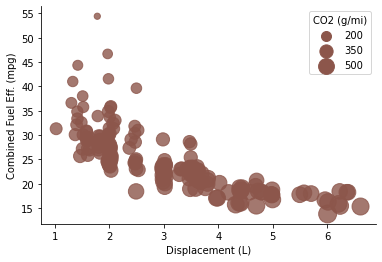

In [31]:
# Non positional encoding - Size

# plot relationship between displ, fuel efficiency and co2 emissions
# since co2 is a quantitative variable then size is best used to reference on the plot using 's' in scatter_kws argument, 
# divided by 2 to reduce the marker size

# the plot shows that as engine size increases there is a higher level of co2 emissions, also cars that are
# less fuel efficient tends to have higher co2 emissions even at similar engine sizes
sns.regplot(x = df_fuel_sub.displ, y = df_fuel_sub.comb, color = color, x_jitter= 0.04, fit_reg= False, 
            scatter_kws = {'s': df_fuel_sub.co2 / 2})

# Constructing the legend
# when we use plotting function in plt or sns we get plotting objects back (including shape of plot), 
# we will use this to construct our legend
# first we identify a size number, sizes are random just consider proportion to values and that they are from the dataset
# second we loop over sizes and make a dummy scatter plot for each size
# this will create a plotting object including the shape of each size,
# Finally we store this object (shape) in a separate list and use it to construct the legend of our main plot
# empty [] in the dummy plot just so nothing gets plotted, 

sizes = [200, 350, 500]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/2, color = color))

# use shape(legend obj) and corresponding size to construct the legend
# in legend function if there is only one argument then it is assumed to be the labels of the legend
# if there are two arguments then the first is the list of objects to be depicted in the legend and the second one
# is the list of labels
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)')

plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

In [32]:
# data of highest displ points
df_fuel_sub.sort_values(by = 'displ', ascending =False).head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
1079,34224,Rolls-Royce,Ghost EWB,2014,Large Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,12,6.6,...,117,12.5264,15.1,20.9824,26.4,15.3013,580,2,2,Automatic
2467,36953,Dodge,Challenger,2016,Midsize Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,8,6.4,...,0,15.0462,18.6,24.6279,34.6,18.2395,486,4,4,Automatic


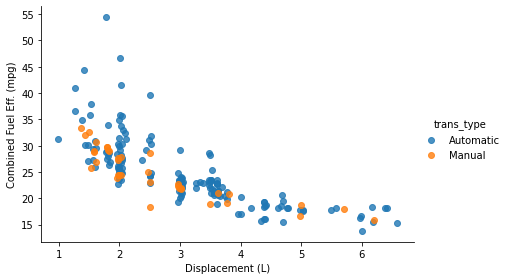

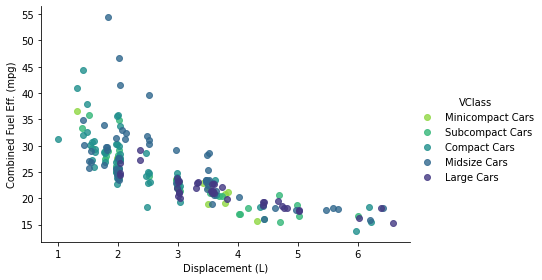

In [33]:
# Non positional encoding - Color

# for categorical data we can use facetgrid and set hue to our variable of choice,
# can use hue_order argument to set order as we deem fit
# since trans type is a nominal type variable (doesn’t have a specific order) so default color from qualitative pallet works fine

g = sns.FacetGrid(data = df_fuel_sub, hue ='trans_type', height= 4, aspect = 1.5)
g.map(sns.regplot, 'displ', 'comb', x_jitter= 0.04, fit_reg= False)

g.add_legend()
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# since Vclass type is an ordinal type (have a specific order), we should use a sequential palette instead
g = sns.FacetGrid(data = df_fuel_sub, hue ='VClass',  height= 4, aspect = 1.5, palette = 'viridis_r')
g.map(sns.regplot, 'displ', 'comb', x_jitter= 0.04, fit_reg= False)

g.add_legend()
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)');

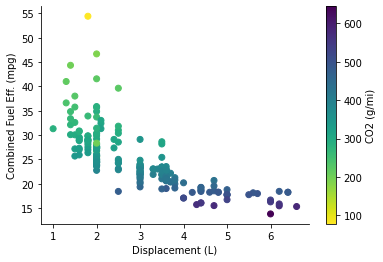

In [34]:
# Another way to plot 3 quantitative variables using colors instead of size for the third variable

# plot relationship between displ, fuel efficiency and co2 emissions

plt.scatter(x = df_fuel_sub.displ, y = df_fuel_sub.comb, c = df_fuel_sub.co2, cmap = 'viridis_r')

plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

#### Faceting in Two directions

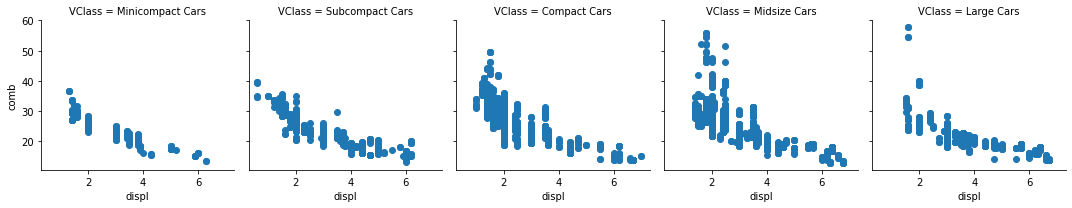

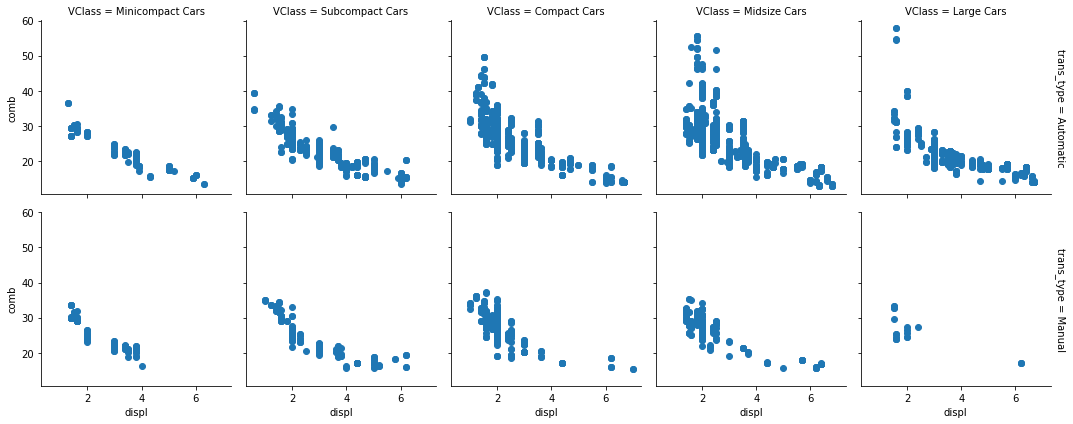

In [35]:
# Faceting in Two directions - Three variables

# plot relationship between displ and comp categorized by 'VClass'
# the plot shows efficiency outliers in the compact, midsize and large cars
g = sns.FacetGrid(data = df_fuel, col = 'VClass')
g.map(plt.scatter, 'displ', 'comb');

# Faceting in Two directions - Four variables

# plot relationship between displ and comp categorized by 'VClass' and 'trans_type'
g = sns.FacetGrid(data = df_fuel, col = 'VClass', row = 'trans_type', margin_titles =True)
g.map(plt.scatter, 'displ', 'comb');

#### Adaptation

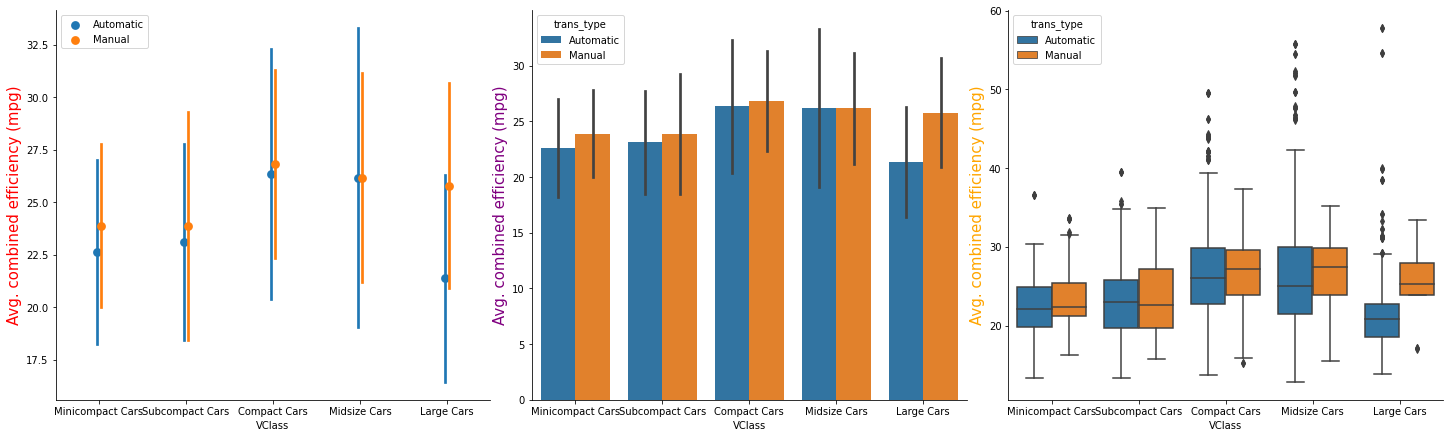

In [36]:
# plot relationship between VClass, fuel efficiency and transmission type,
# this will transform earlier bivariate plot to be multivariate

fig, axes = plt.subplots(ncols = 3, figsize = (20, 6))
fig.tight_layout()
ax1, ax2, ax3 = axes

# point plot
# dodge argument separate overlapping points
sns.pointplot(x = df_fuel.VClass, y = df_fuel.comb , hue = df_fuel.trans_type, ci='sd', linestyles = '', dodge = True, ax = ax1)

# adaptive barchart
sns.barplot(x = df_fuel.VClass, y = df_fuel.comb , hue = df_fuel.trans_type, ci='sd', ax = ax2)

# adaptive boxplot
sns.boxplot(x = df_fuel.VClass, y = df_fuel.comb , hue = df_fuel.trans_type, ax = ax3)

ax1.spines["top"].set_alpha(0.0); ax1.spines["right"].set_alpha(0.0); ax2.spines["top"].set_alpha(0.0); 
ax2.spines["right"].set_alpha(0.0); ax3.spines["top"].set_alpha(0.0); ax3.spines["right"].set_alpha(0.0)
ax1.set_ylabel('Avg. combined efficiency (mpg)', c='red', fontsize=15)
ax2.set_ylabel('Avg. combined efficiency (mpg)', c='purple', fontsize=15)
ax3.set_ylabel('Avg. combined efficiency (mpg)', c='orange', fontsize=15)
ax1.legend(loc=2);

In [37]:
# Summary statistics of engine size (displ), fuel efficiency (comb) and co2 emissions
df_fuel[['displ', 'comb', 'co2']].describe()

,displ,comb,co2
count,3929.000000,3929.000000,3929.000000
mean,2.950573,24.791339,376.564266
std,1.305901,6.003246,92.338892
min,0.600000,12.821700,29.000000
25%,2.000000,20.658100,315.000000
50%,2.500000,24.000000,369.000000
75%,3.600000,28.227100,429.000000
max,7.000000,57.782400,692.000000


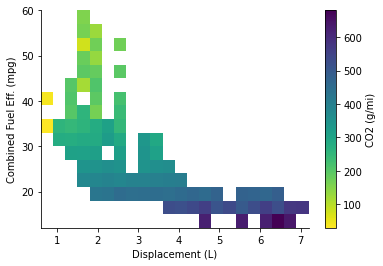

In [38]:
# Adaptive 2d histogram of relationship between displ, fuel efficiency and co2 emissions

# instead of color be based on count it will be based on the mean of a third variable (co2 emissions)
# weights argument in 'hist2d' measures how much each data point is worth in the aggregation 
# by default each point weight is worth 1 so that the colors reflect the total counts 
# to plot a third variable we need to change weight to be co2 emissions of each data point to the total cars in each bin 
# first we determine which bin does each point belong using pandas 'cut' function
# then count n of points in each bin. Finally, calculate weight of each point in each bin 
# so the total of each bin will be the average CO2 emission

# Instantiate size of bins, using min max values from summary statistics of each variable
bin_x = np.arange(0.6, 7 + 0.3, 0.3)
bin_y = np.arange(12, 58 + 3, 3)

# determine bins of each data point, labels argument ensure that bins are identified numiracly (i.e bin 1,2,3, etc..) 
# and astype to make indexing easier (change dtype from int64 to int32)
displ_bins = pd.cut(df_fuel.displ, bin_x, right = False, include_lowest = False, labels = False).astype(int)
comb_bins = pd.cut(df_fuel.comb, bin_y, right = False, include_lowest = False, labels = False).astype(int)

# count n of points in each bin
n_points = df_fuel.groupby([displ_bins, comb_bins]).size().T.to_frame().unstack().values

# calculate weight of points in each bin
co2weights = df_fuel.co2 / n_points[displ_bins, comb_bins]

plt.hist2d(x = df_fuel.displ, y = df_fuel.comb, cmin = 0.5, cmap = 'viridis_r', bins = [bin_x, bin_y], weights = co2weights)

plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

#### Plot Matrix / Heat maps

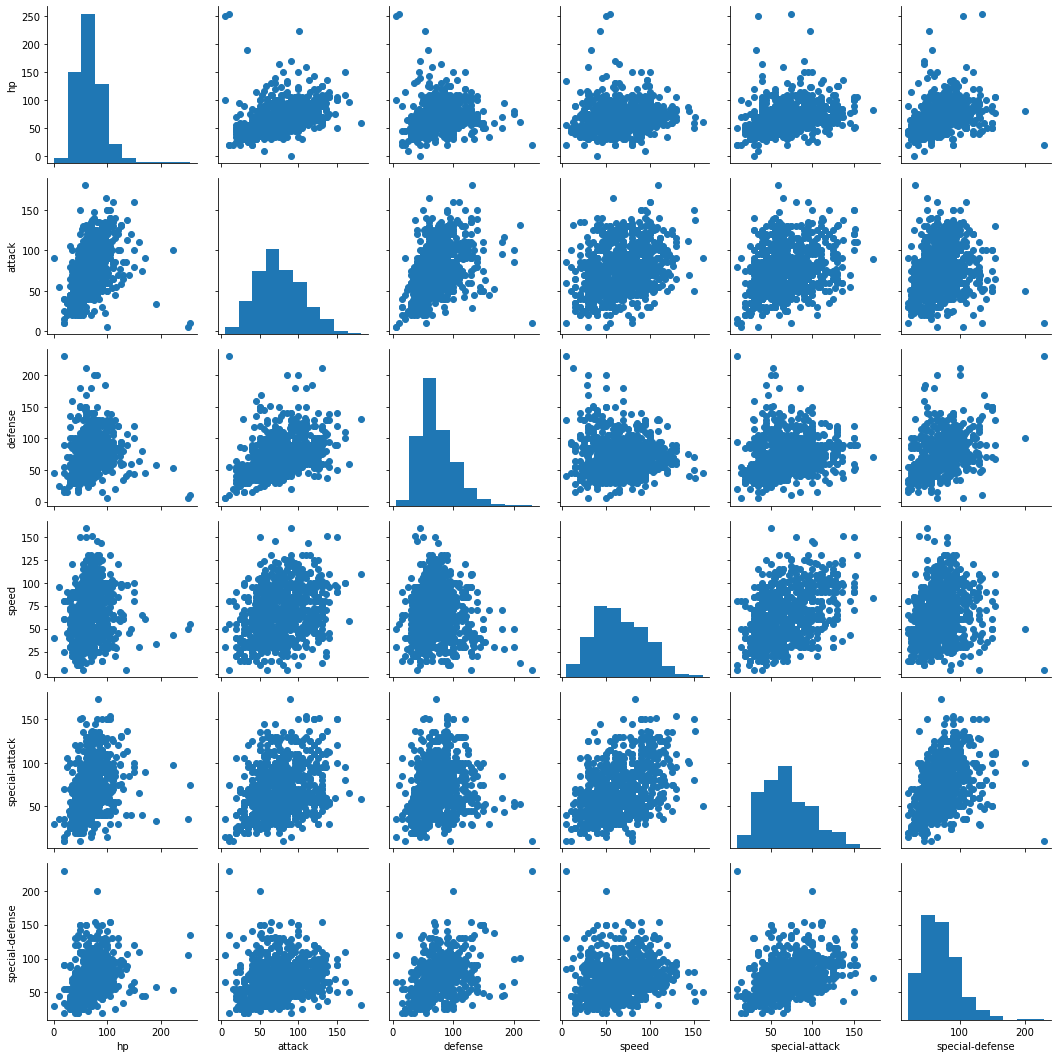

In [39]:
# specify variables of interest, otherwise all numeric variables will be plotted
pkm_stats = df_pok.columns[8:]

# instantiate the grid
g = sns.PairGrid(data = df_pok, vars = pkm_stats)

# Fill grid with plots, off diag is where bivariate plots should be placed
g = g.map_offdiag(plt.scatter)

# diag is where same variable's row and column intersect, so univariate plots best plotted here
g.map_diag(plt.hist);

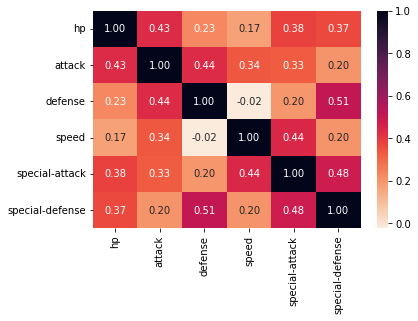

In [40]:
# the heatmap supports the observations of pairwise grid, it deems further investigation of high corr between
# defense and special defense. Maybe the outlier on the upper right is boosting the statistic (check pairgrid)
sns.heatmap(df_pok[pkm_stats].corr(), cmap = 'rocket_r', annot = True, fmt ='.2f');